# Initial Conditions and the Structure of the Singularity in Pre-Big-Bang Cosmology by Feinstein et al
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

https://arxiv.org/abs/hep-th/0002070

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
xi,x,y,z,dxi,dx,dy,dz = symbols('xi x y z dxi dx dy dz')

In [4]:
f = Function('f')(xi,z)
f

In [5]:
psi = Function('psi')(xi,z)
psi

In [8]:
variables = Matrix( [xi,x,y,z] )
variables

⎡ξ⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [9]:
differentials = Matrix( [dxi,dx,dy,dz] ) 
differentials

⎡dxi⎤
⎢   ⎥
⎢dx ⎥
⎢   ⎥
⎢dy ⎥
⎢   ⎥
⎣dz ⎦

In [11]:
lineElement = expand(exp(f) * ( -dxi**2 + dz**2 ) + xi * ( exp(psi) * dx**2 + exp(-psi) * dy**2 ) )
lineElement

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  f(ξ, z)                                   ⎤
⎢-ℯ             0            0          0    ⎥
⎢                                            ⎥
⎢              ψ(ξ, z)                       ⎥
⎢    0      ξ⋅ℯ              0          0    ⎥
⎢                                            ⎥
⎢                          -ψ(ξ, z)          ⎥
⎢    0          0       ξ⋅ℯ             0    ⎥
⎢                                            ⎥
⎢                                     f(ξ, z)⎥
⎣    0          0            0       ℯ       ⎦

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡  f(ξ, z)                                   ⎤
⎢-ℯ             0            0          0    ⎥
⎢                                            ⎥
⎢              ψ(ξ, z)                       ⎥
⎢    0      ξ⋅ℯ              0          0    ⎥
⎢                                            ⎥
⎢                          -ψ(ξ, z)          ⎥
⎢    0          0       ξ⋅ℯ             0    ⎥
⎢                                            ⎥
⎢                                     f(ξ, z)⎥
⎣    0          0            0       ℯ       ⎦

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("xi x y z")
xi,x,y,z = syms

In [17]:
metric = MetricTensor(m,syms)

In [18]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡⎡∂                                                                                         
⎢⎢──(f(ξ, z))                                                                               
⎢⎢∂ξ                                                                                        
⎢⎢───────────                          0                                                  0 
⎢⎢     2                                                                                    
⎢⎢                                                                                          
⎢⎢              ⎛     ψ(ξ, z) ∂              ψ(ξ, z)⎞  -f(ξ, z)                             
⎢⎢             -⎜- ξ⋅ℯ       ⋅──(ψ(ξ, z)) - ℯ       ⎟⋅ℯ                                     
⎢⎢              ⎝             ∂ξ                    ⎠                                       
⎢⎢     0       ─────────────────────────────────────────────────                          0 
⎢⎢                                     2                              

In [19]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡   ⎛    2              2                         2⎞                                        
⎢ 2 ⎜   ∂              ∂             ⎛∂          ⎞ ⎟     ∂                                  
⎢ξ ⋅⎜- ───(f(ξ, z)) + ───(f(ξ, z)) - ⎜──(ψ(ξ, z))⎟ ⎟ + ξ⋅──(f(ξ, z)) + 1                    
⎢   ⎜    2              2            ⎝∂ξ         ⎠ ⎟     ∂ξ                                 
⎢   ⎝  ∂ξ             ∂z                           ⎠                                        
⎢───────────────────────────────────────────────────────────────────────                    
⎢                                     2                                                     
⎢                                  2⋅ξ                                                      
⎢                                                                                           
⎢                                                                         ⎛    2            
⎢                                                                     

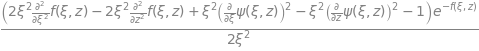

In [20]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [21]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡   ⎛    2              2                         2⎞                            ⎛       2   
⎢ 2 ⎜   ∂              ∂             ⎛∂          ⎞ ⎟     ∂                      ⎜   2  ∂    
⎢ξ ⋅⎜- ───(f(ξ, z)) + ───(f(ξ, z)) - ⎜──(ψ(ξ, z))⎟ ⎟ + ξ⋅──(f(ξ, z)) + 1   0.25⋅⎜2⋅ξ ⋅───(f(
⎢   ⎜    2              2            ⎝∂ξ         ⎠ ⎟     ∂ξ                     ⎜       2   
⎢   ⎝  ∂ξ             ∂z                           ⎠                            ⎝     ∂ξ    
⎢─────────────────────────────────────────────────────────────────────── + ─────────────────
⎢                                     2                                                     
⎢                                  2⋅ξ                                                      
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [22]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     